# Salary Predictions Based on Job Descriptions

In [1]:
__author__ = "Thiago do Couto"
__email__ = "thiago.coutoreis@gmail.com"
__website__ = "www.thiagodocouto.com.br"
__version__ = "0.1"

# Part 1 - DEFINE PROBLEM

Write the problem in your own words here

## Part 2 - DISCOVER

### ---- About the data ----

Lorem Ipsum

### ---- 1 Load libraries ----

In [2]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Allow multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

### ---- 2 Load the data ----

In [3]:
# Load data into Pandas Dataframe
df_train_feat = pd.read_csv('data/train_features.csv')
df_train_salaries = pd.read_csv('data/train_salaries.csv')
df_test_feat = pd.read_csv('data/test_features.csv')

# Join dataframes
df = df_train_feat.join(df_train_salaries.set_index('jobId'), on = 'jobId')
df.head(3)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137


### ---- 3 Clean the data ----

First we'll check for dataframe consistency.

In [4]:
# Define array for numeric columns loops
intcolumns = ['yearsExperience','milesFromMetropolis','salary']

# Check for column types
print('1 - Check for column types:')
print(df.dtypes)

# Look for duplicates
print('\n2 - Is there any duplicated row? ', df.duplicated().any())

# Look for negative values in numeric data
print('\n3 - How many negative values exists in each numeric column?')
for check in intcolumns:
    print('Column', check, ':', (df[check] < 0).sum())

# Look for zeroes in numeric data
print('\n4 - How many zeroes exists in each numeric column?')
for check in intcolumns:
    print('Column', check, ':', (df[check] == 0).sum())

# Look for NaNs
print('\n5 - Check for NaNs in each attribute:')
print(df.isna().any())

# Look for null values
print('\n6 - Check null values in each attribute:')
print(df.isnull().any())

1 - Check for column types:
jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

2 - Is there any duplicated row?  False

3 - How many negative values exists in each numeric column?
Column yearsExperience : 0
Column milesFromMetropolis : 0
Column salary : 0

4 - How many zeroes exists in each numeric column?
Column yearsExperience : 39839
Column milesFromMetropolis : 10123
Column salary : 5

5 - Check for NaNs in each attribute:
jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

6 - Check null values in each attribute:
jobId               

Now we'll execute data cleaning.

In [5]:
# As there were only 5 entries (< 0,05%) with 'salary' == 0, those observations will be removed from the dataset
df.drop(df[df['salary'] == 0].index, inplace = True)

#### The 'milesFromMetropolis' and 'yearsExperience' attributes may have ZEROES
#### E.g.: The person lives at the metropolis and is a novice.

### ---- 4 Explore the data (EDA) ----

In [6]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [7]:
# Check for numeric summary of the dataframe
df.describe()

# Check for value distribution in discrete attibutes
strcolumns = ['jobType', 'degree', 'major', 'industry']
for check in strcolumns:
    df[check].value_counts().to_frame()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


,jobType
SENIOR,125886
VICE_PRESIDENT,125234
MANAGER,125120
CTO,125045
JANITOR,124971
CEO,124778
JUNIOR,124592
CFO,124369


,degree
HIGH_SCHOOL,236975
NONE,236853
BACHELORS,175495
DOCTORAL,175362
MASTERS,175310


,major
NONE,532353
CHEMISTRY,58875
LITERATURE,58684
ENGINEERING,58594
BUSINESS,58518
PHYSICS,58410
COMPSCI,58382
BIOLOGY,58379
MATH,57800


,industry
WEB,143205
AUTO,142941
FINANCE,142866
EDUCATION,142819
OIL,142770
HEALTH,142755
SERVICE,142639


#### Then we'll check the distribution of the 'salary' attribute.

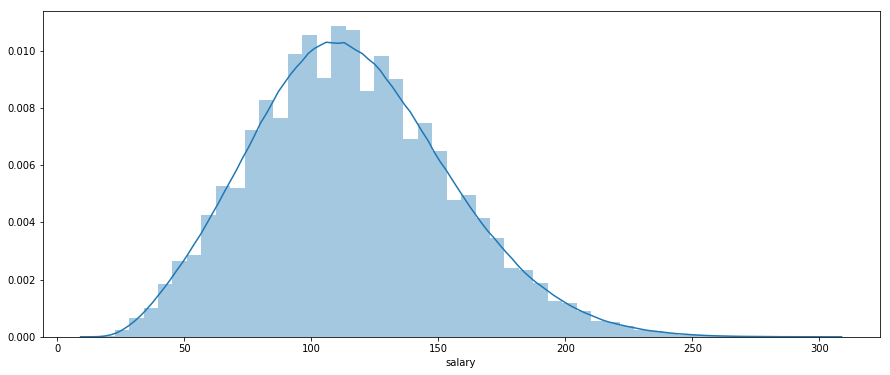

In [8]:
# Plot histogram and distribution of the target variable
plt.figure(figsize = (15,6))
sns.distplot(df['salary'])
plt.show();

#### The 'salary' attribute seems to be normally distributed.

#### We'll then look for correlations between the other attributes and the 'salary' target.

In [9]:
# Define a function to order Boxplots through 'salary' median
def sorted_boxplot(df, xval, yval):
    plt.figure(figsize = (15,6))
    tempdf = pd.DataFrame({col: vals[yval] for col, vals in df.groupby(xval)})
    meds = tempdf.median().sort_values()
    sns.boxplot(data = df, x = df[xval], y = yval, order = tempdf[meds.index])  
    plt.show()

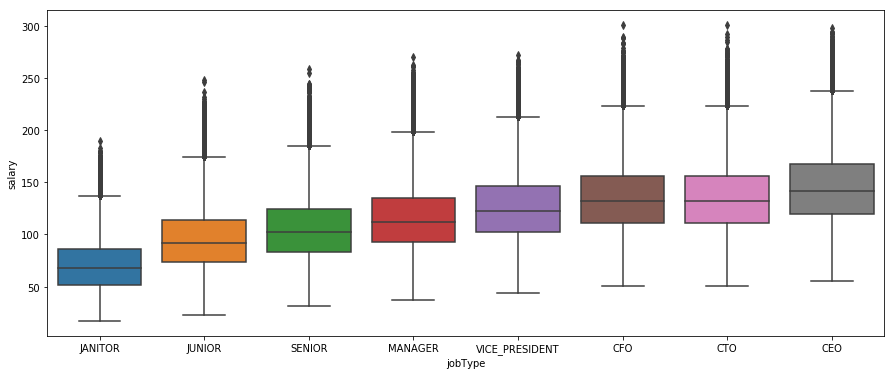

In [10]:
# Plot the 'jobType' vs 'salary' comparison
sorted_boxplot(df, xval = 'jobType', yval = 'salary')

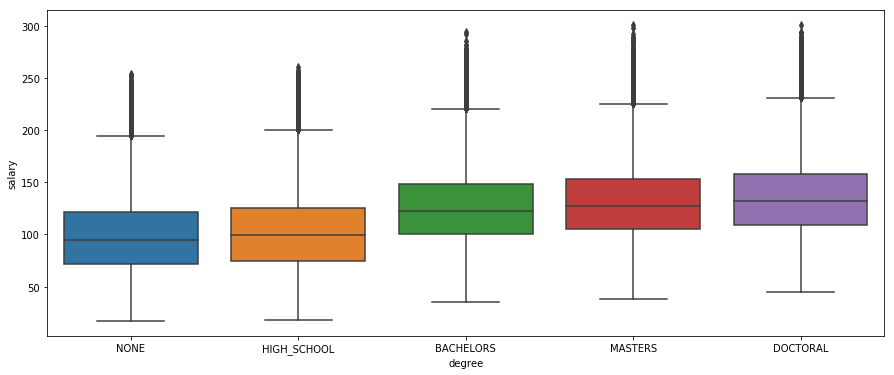

In [11]:
# Plot the 'degree' vs 'salary' comparison
sorted_boxplot(df, xval = 'degree', yval = 'salary')

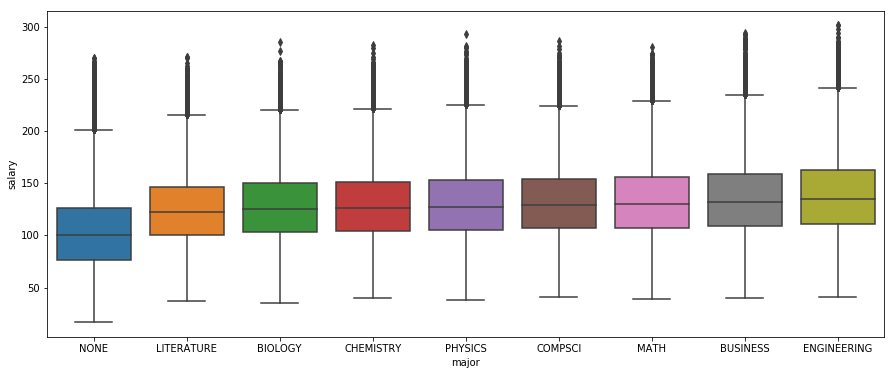

In [12]:
# Plot the 'major' vs 'salary' comparison
sorted_boxplot(df, xval = 'major', yval = 'salary')

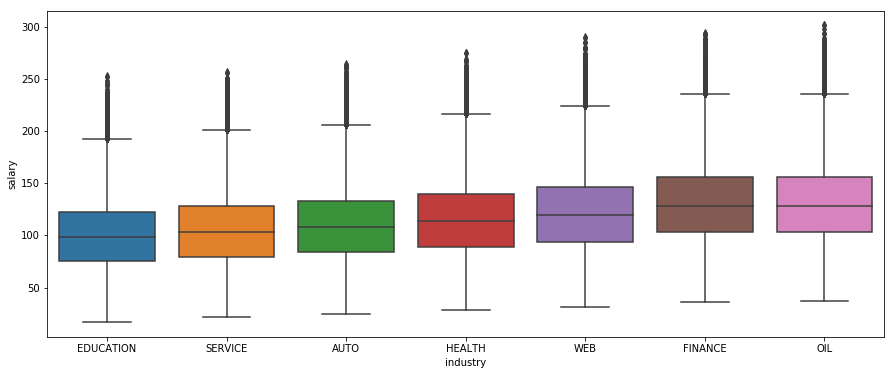

In [13]:
# Plot the 'industry' vs 'salary' comparison
sorted_boxplot(df, xval = 'industry', yval = 'salary')

In [14]:
# Check for correlation between the numerical variables
df.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


#### As 'milesFromMetropolis' increases, 'salary' decreases. Therefore it's a negative correlation (-0.29).
#### As 'yearsExperience' increases, 'salary' also increases. It's a positive correlation (0.37).

### ---- 5 Establish a baseline ----

In [ ]:
lr_model = LinearRegression(random_state = 1)
lr_model.fit()

### Check RMSE of the model vs the stardard deviation of the target variable.

In [ ]:
np.sqrt(mse_baseline)/df.salary.std()*10

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data